<a href="https://colab.research.google.com/github/kapoor1309/BH-25/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import csv
import numpy as np
import os
from glob import glob
import json
import random
import cv2
import matplotlib.pyplot as plt


In [ ]:
dataset_dir='/content/drive/MyDrive/CholecT50'

In [ ]:
import pandas as pd
instrument=pd.read_csv('/content/drive/MyDrive/dsg-bh-2y/dict/instrument.txt')

In [ ]:
print(instrument)

     0:grasper
0    1:bipolar
1       2:hook
2   3:scissors
3    4:clipper
4  5:irrigator


In [ ]:
maps=pd.read_csv('/content/drive/MyDrive/dsg-bh-2y/dict/maps.txt')
print(maps)

    # IVT   I   V   T   IV   IT
0       0   0   2   1    2    1
1       1   0   2   0    2    0
2       2   0   2  10    2   10
3       3   0   0   3    0    3
4       4   0   0   2    0    2
..    ...  ..  ..  ..  ...  ...
95     95   1   9  14   19   29
96     96   2   9  14   29   44
97     97   3   9  14   39   59
98     98   4   9  14   49   74
99     99   5   9  14   59   89

[100 rows x 6 columns]


In [ ]:
target=pd.read_csv('/content/drive/MyDrive/dsg-bh-2y/dict/target.txt')
print(target)

              0:gallbladder
0            1:cystic_plate
1             2:cystic_duct
2           3:cystic_artery
3          4:cystic_pedicle
4            5:blood_vessel
5                   6:fluid
6   7:abdominal_wall_cavity
7                   8:liver
8                9:adhesion
9                10:omentum
10            11:peritoneum
11                   12:gut
12          13:specimen_bag
13           14:null_target


In [ ]:
triplet=pd.read_csv('/content/drive/MyDrive/dsg-bh-2y/dict/triplet.txt')
print(triplet)

       0:grasper    dissect    cystic_plate
0      1:grasper    dissect     gallbladder
1      2:grasper    dissect         omentum
2      3:grasper      grasp   cystic_artery
3      4:grasper      grasp     cystic_duct
4      5:grasper      grasp  cystic_pedicle
..           ...        ...             ...
94    95:bipolar  null_verb     null_target
95       96:hook  null_verb     null_target
96   97:scissors  null_verb     null_target
97    98:clipper  null_verb     null_target
98  99:irrigator  null_verb     null_target

[99 rows x 3 columns]


Total videos: 15
Sample video folders: ['VID01', 'VID02', 'VID04', 'VID05', 'VID08']

Video: VID01
Total frames: 1734


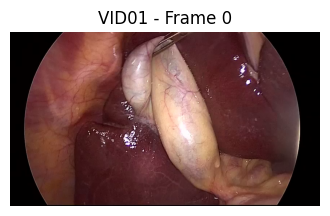

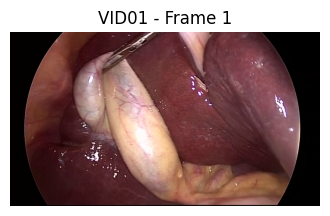

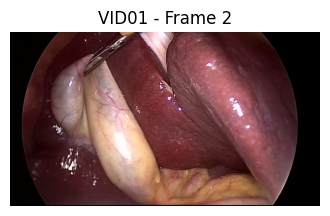


Video: VID02
Total frames: 2840


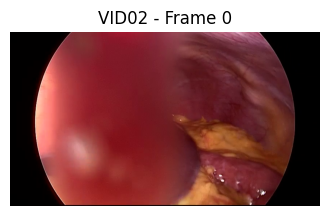

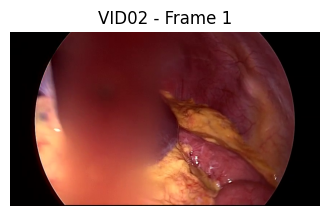

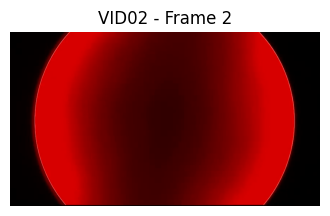


Video: VID04
Total frames: 1523


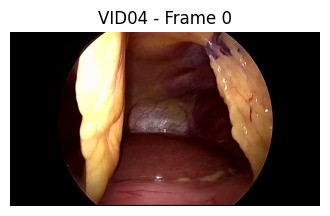

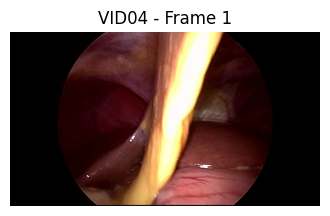

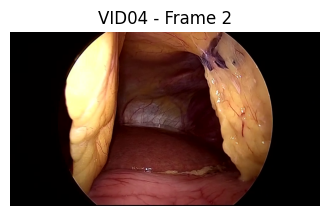

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

video_folders = os.listdir(dataset_dir)
print(f"Total videos: {len(video_folders)}")
print("Sample video folders:", video_folders[:5])


num_videos_to_display = 3  # Number of videos to showcase
frames_per_video = 3  # Number of frames to display per video

for video_idx, video_folder in enumerate(video_folders[:num_videos_to_display]):
    video_path = os.path.join(dataset_dir, video_folder)
    frame_files = sorted(os.listdir(video_path))

    print(f"\nVideo: {video_folder}")
    print(f"Total frames: {len(frame_files)}")

    # Display a few frames
    for frame_idx, frame_file in enumerate(frame_files[:frames_per_video]):
        frame_path = os.path.join(video_path, frame_file)
        frame = cv2.imread(frame_path)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(4, 4))
        plt.imshow(frame)
        plt.title(f"{video_folder} - Frame {frame_idx}")
        plt.axis('off')
        plt.show()